<a href="https://colab.research.google.com/github/younesA99/svm/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
TrainPd=pd.read_excel("Concrete_Data.xls")
#renaming all featurses
TrainPd.columns = ['cement','blastFurnace','flyAsh','water','superplasticizer','courseAggregate','fineaggregate','age','strength']

#Verification des valeur manquantes
TrainPd.isna().sum()

# Split the data into features and target
X=TrainPd.drop(["strength"],axis=1)
Y=TrainPd["strength"]
Names=list(X.columns.values)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state = 1)

#Normalisation des données
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Fit on training set only.
scaler.fit(X_train)
MinMaxScaler(copy=(), feature_range=(0,1))
# Apply transform to both the training set and the test set.
X_train_transformed = scaler.transform(X_train)
X_test_transoformed = scaler.transform(X_test)

In [10]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Instancier le modèle KNN avec les hyperparamètres spécifiés
model = KNeighborsRegressor(n_neighbors=8, weights='distance', algorithm='brute')

# Entraîner le modèle sur l'ensemble d'entraînement
model.fit(X_train_transformed, Y_train)

# Faire des prédictions sur l'ensemble de test
Y_pred_test = model.predict(X_test_transoformed)

# Faire des prédictions sur l'ensemble d'entraînement
Y_pred_train = model.predict(X_train_transformed)

# Calculer les métriques de performance sur l'ensemble de test
mae_test = mean_absolute_error(Y_test, Y_pred_test)
rmse_test = mean_squared_error(Y_test, Y_pred_test, squared=False)
r2_test = r2_score(Y_test, Y_pred_test)

# Calculer les métriques de performance sur l'ensemble d'entraînement
mae_train = mean_absolute_error(Y_train, Y_pred_train)
rmse_train = mean_squared_error(Y_train, Y_pred_train, squared=False)
r2_train = r2_score(Y_train, Y_pred_train)

# Afficher les performances sur l'ensemble de test
print("Performance sur l'ensemble de test:")
print("Mean Absolute Error (MAE):", mae_test)
print("Root Mean Squared Error (RMSE):", rmse_test)
print("R-squared (R²):", r2_test)

# Afficher les performances sur l'ensemble d'entraînement
print("\nPerformance sur l'ensemble d'entraînement:")
print("Mean Absolute Error (MAE):", mae_train)
print("Root Mean Squared Error (RMSE):", rmse_train)
print("R-squared (R²):", r2_train)


Performance sur l'ensemble de test:
Mean Absolute Error (MAE): 6.632237247878024
Root Mean Squared Error (RMSE): 9.283511801678577
R-squared (R²): 0.6694099588755063

Performance sur l'ensemble d'entraînement:
Mean Absolute Error (MAE): 0.06378894203342869
Root Mean Squared Error (RMSE): 0.9452743221836721
R-squared (R²): 0.9968369695524166


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Création de l'instance du modèle KNN avec les hyperparamètres
# weights='distance' attribue des poids basés sur la distance
# algorithm='auto' choisit automatiquement l'algorithme approprié
knn_regressor = KNeighborsRegressor(n_neighbors=4, weights='uniform', algorithm='auto')

# Entraînement du modèle sur les données d'entraînement normalisées
knn_regressor.fit(X_train_transformed, Y_train)

# Prédiction sur les données de test
predictions = knn_regressor.predict(X_test_transoformed)

# Évaluation du modèle
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(Y_test, predictions)
r2 = r2_score(Y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


Mean Squared Error: 98.64550413373358
R-squared Score: 0.6216075386370103


In [ ]:
predictions_df = pd.DataFrame({'Y_test': Y_test.values, 'predictions1': predictions})
predictions_df.head()

,Y_test,predictions1
0,21.911547,40.482583
1,19.932751,23.664540
2,36.438807,26.837164
3,11.957582,16.106676
4,39.844818,32.165607


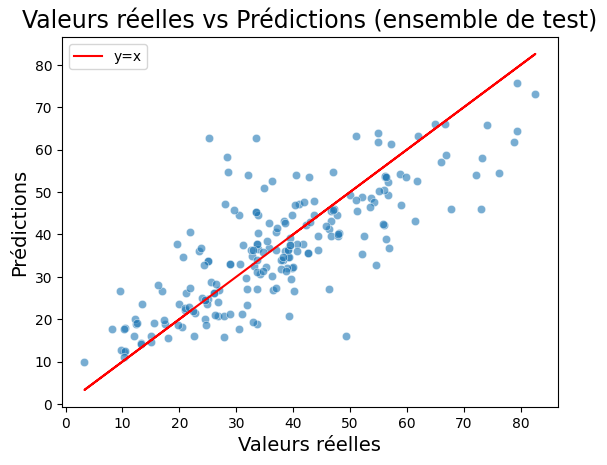

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Création du nuage de points

sns.scatterplot( x=Y_test, y=predictions, alpha=0.6)

# Tracé de la droite y = x pour comparer
plt.plot(predictions_df['Y_test'], predictions_df['Y_test'], color='red', label='y=x')

plt.xlabel('Valeurs réelles', fontsize=14)
plt.ylabel('Prédictions', fontsize=14)
plt.title('Valeurs réelles vs Prédictions (ensemble de test)', fontsize=17)
plt.legend()
plt.show()

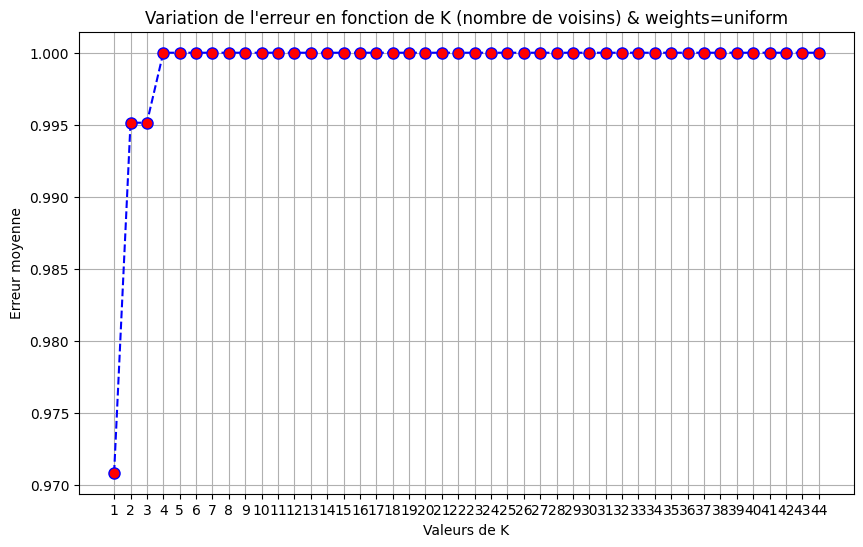

In [ ]:
import matplotlib.pyplot as plt

diff_k = []
for i in range(1, 45):
    knn = KNeighborsRegressor(n_neighbors=i, weights='uniform', algorithm='auto')
    knn.fit(X_train_transformed, Y_train)
    pred_i = knn.predict(X_test_transoformed)
    diff_k.append(np.mean(pred_i != Y_test))

# Tracé de la variation de l'erreur en fonction de différentes valeurs de K
plt.figure(figsize=(10, 6))
plt.plot(range(1, 45), diff_k, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=8)
plt.title('Variation de l\'erreur en fonction de K (nombre de voisins) & weights=uniform')
plt.xlabel('Valeurs de K')
plt.ylabel('Erreur moyenne')
plt.xticks(range(1, 45))
plt.grid(True)
plt.show()


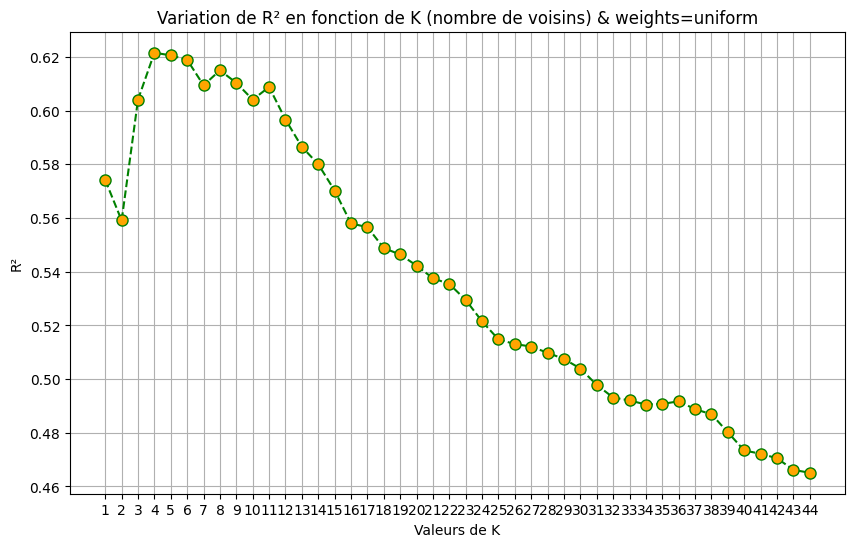

In [ ]:
r2_values = []
for i in range(1, 45):
    knn = KNeighborsRegressor(n_neighbors=i, weights='uniform', algorithm='auto')
    knn.fit(X_train_transformed, Y_train)
    predictions = knn.predict(X_test_transoformed)
    r2 = r2_score(Y_test, predictions)
    r2_values.append(r2)

# Tracer K en fonction de R²
plt.figure(figsize=(10, 6))
plt.plot(range(1, 45), r2_values, color='green', linestyle='dashed', marker='o', markerfacecolor='orange', markersize=8)
plt.title('Variation de R² en fonction de K (nombre de voisins) & weights=uniform')
plt.xlabel('Valeurs de K')
plt.ylabel('R²')
plt.xticks(range(1, 45))
plt.grid(True)
plt.show()


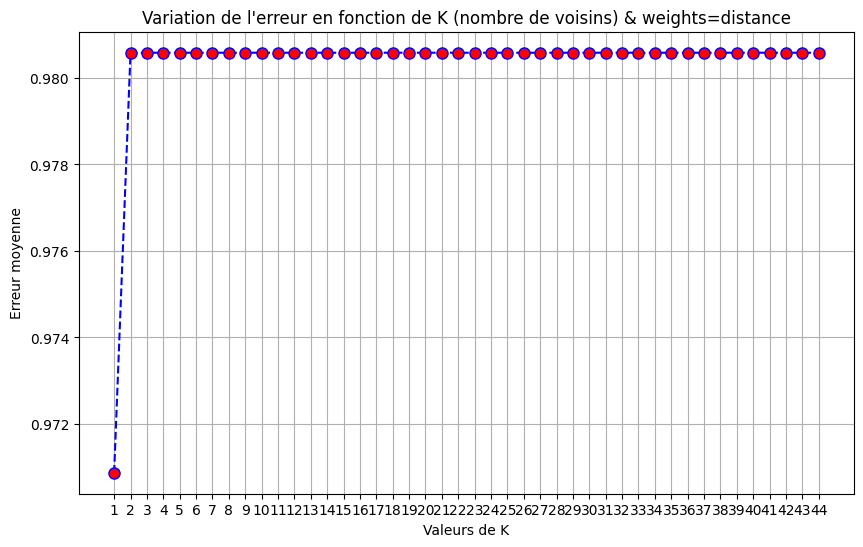

In [ ]:
import matplotlib.pyplot as plt

diff_k = []
for i in range(1, 45):
    knn = KNeighborsRegressor(n_neighbors=i, weights='distance', algorithm='auto')
    knn.fit(X_train_transformed, Y_train)
    pred_i = knn.predict(X_test_transoformed)
    diff_k.append(np.mean(pred_i != Y_test))

# Tracé de la variation de l'erreur en fonction de différentes valeurs de K
plt.figure(figsize=(10, 6))
plt.plot(range(1, 45), diff_k, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=8)
plt.title('Variation de l\'erreur en fonction de K (nombre de voisins) & weights=distance')
plt.xlabel('Valeurs de K')
plt.ylabel('Erreur moyenne')
plt.xticks(range(1, 45))
plt.grid(True)
plt.show()

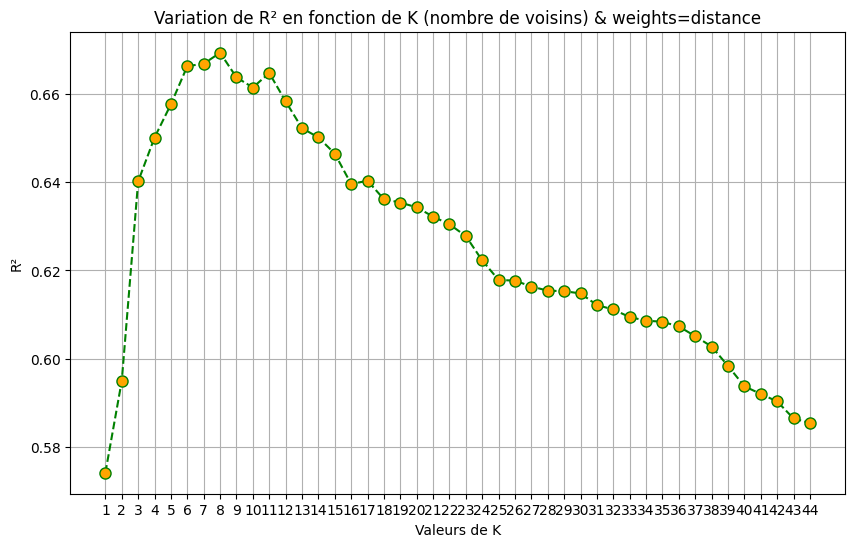

In [ ]:
r2_values = []
for i in range(1, 45):
    knn = KNeighborsRegressor(n_neighbors=i, weights='distance', algorithm='auto')
    knn.fit(X_train_transformed, Y_train)
    predictions = knn.predict(X_test_transoformed)
    r2 = r2_score(Y_test, predictions)
    r2_values.append(r2)

# Tracer K en fonction de R²
plt.figure(figsize=(10, 6))
plt.plot(range(1, 45), r2_values, color='green', linestyle='dashed', marker='o', markerfacecolor='orange', markersize=8)
plt.title('Variation de R² en fonction de K (nombre de voisins) & weights=distance')
plt.xlabel('Valeurs de K')
plt.ylabel('R²')
plt.xticks(range(1, 45))
plt.grid(True)
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

n_neighbors_values = range(1, 51)
weights_values = ['distance', 'uniform']
algorithm_values = ['auto', 'ball_tree', 'kd_tree', 'brute']

best_model = None
best_score = -float('inf')
best_hyperparameters = None

for n_neighbors in n_neighbors_values:
    for weight in weights_values:
        for algorithm in algorithm_values:
            # Création du modèle KNN avec les hyperparamètres actuels
            knn = KNeighborsRegressor(n_neighbors=n_neighbors, weights=weight, algorithm=algorithm)

            # Entrainement du modèle
            knn.fit(X_train_transformed, Y_train)

            # Prédiction sur les données de test
            predictions = knn.predict(X_test_transoformed)

            # Calcul des différentes métriques d'évaluation
            mse = mean_squared_error(Y_test, predictions)
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(Y_test, predictions)
            r2 = r2_score(Y_test, predictions)

            # Affichage des résultats
            print(f"n_neighbors={n_neighbors}, weights={weight}, algorithm={algorithm}:")
            print(f"MSE: {mse}, RMSE: {rmse}, MAE: {mae}, R²: {r2}\n")

            # Comparaison des modèles et conservation du meilleur modèle basé sur R²
            if r2 > best_score:
                best_score = r2
                best_model = knn
                best_hyperparameters = {'n_neighbors': n_neighbors, 'weights': weight, 'algorithm': algorithm}

print(f"Meilleur modèle obtenu avec R²={best_score}")
print(f"Meilleures hyperparamètres : {best_hyperparameters}")


n_neighbors=1, weights=distance, algorithm=auto:
MSE: 111.01780960542872, RMSE: 10.536498925422464, MAE: 7.299885482916161, R²: 0.5741488413422742

n_neighbors=1, weights=distance, algorithm=ball_tree:
MSE: 111.01780960542872, RMSE: 10.536498925422464, MAE: 7.299885482916161, R²: 0.5741488413422742

n_neighbors=1, weights=distance, algorithm=kd_tree:
MSE: 111.01780960542872, RMSE: 10.536498925422464, MAE: 7.299885482916161, R²: 0.5741488413422742

n_neighbors=1, weights=distance, algorithm=brute:
MSE: 111.01780960542872, RMSE: 10.536498925422464, MAE: 7.299885482916161, R²: 0.5741488413422742

n_neighbors=1, weights=uniform, algorithm=auto:
MSE: 111.01780960542872, RMSE: 10.536498925422464, MAE: 7.299885482916161, R²: 0.5741488413422742

n_neighbors=1, weights=uniform, algorithm=ball_tree:
MSE: 111.01780960542872, RMSE: 10.536498925422464, MAE: 7.299885482916161, R²: 0.5741488413422742

n_neighbors=1, weights=uniform, algorithm=kd_tree:
MSE: 111.01780960542872, RMSE: 10.536498925422464

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Création de l'instance du modèle KNN avec les hyperparamètres
# weights='distance' attribue des poids basés sur la distance
# algorithm='auto' choisit automatiquement l'algorithme approprié
knn_regressor = KNeighborsRegressor(n_neighbors=8, weights='distance', algorithm='brute')

# Entraînement du modèle sur les données d'entraînement normalisées
knn_regressor.fit(X_train_transformed, Y_train)

# Prédiction sur les données de test
predictions = knn_regressor.predict(X_test_transoformed)

# Évaluation du modèle
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(Y_test, predictions)
r2 = r2_score(Y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


Mean Squared Error: 86.18359137190541
R-squared Score: 0.6694099588755063


In [ ]:
# Création d'un DataFrame avec les colonnes ID, Y_test et predictions
results_df = pd.DataFrame({'Y_test': Y_test.values, 'predictions': predictions})

# Affichage des cinq premières lignes du DataFrame
print(results_df.head())

      Y_test  predictions
0  21.911547    37.784206
1  19.932751    22.190959
2  36.438807    32.270648
3  11.957582    16.282074
4  39.844818    31.916607


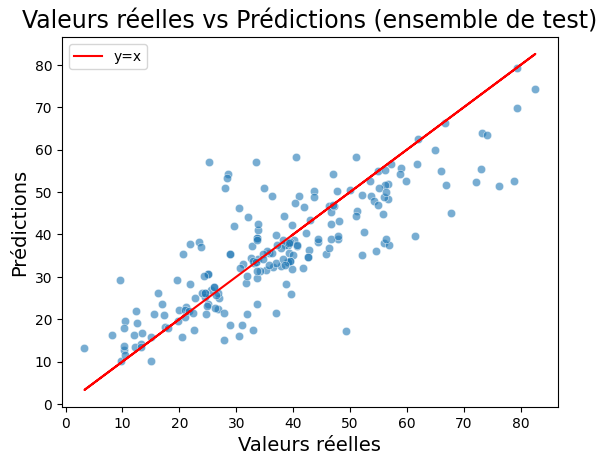

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Création du nuage de points

sns.scatterplot( x=Y_test, y=predictions, alpha=0.6)

# Tracé de la droite y = x pour comparer
plt.plot(results_df['Y_test'], results_df['Y_test'], color='red', label='y=x')

plt.xlabel('Valeurs réelles', fontsize=14)
plt.ylabel('Prédictions', fontsize=14)
plt.title('Valeurs réelles vs Prédictions (ensemble de test)', fontsize=17)
plt.legend()
plt.show()

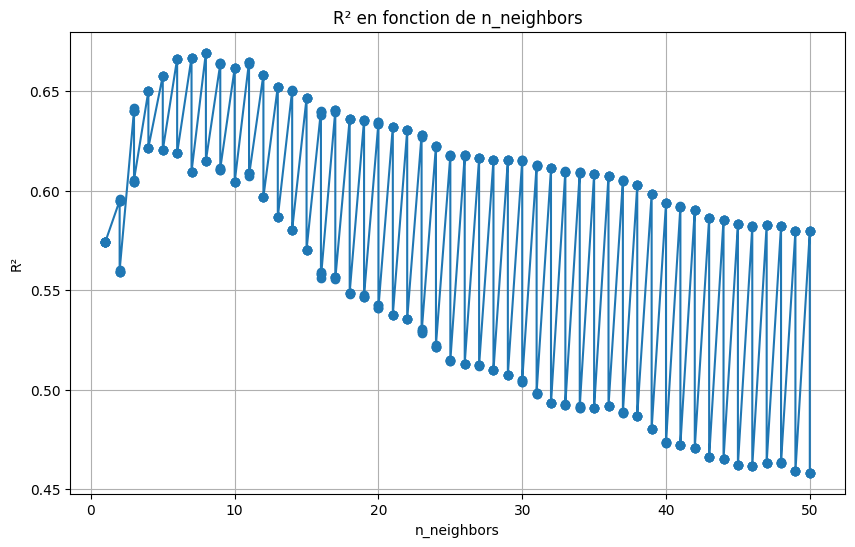

In [ ]:
import matplotlib.pyplot as plt

n_neighbors_values = range(1, 51)
weights_values = ['distance', 'uniform']
algorithm_values = ['auto', 'ball_tree', 'kd_tree', 'brute']

r2_scores = []  # Stocker les scores R²
n_neighbors_list = []  # Stocker les valeurs de n_neighbors

for n_neighbors in n_neighbors_values:
    for weight in weights_values:
        for algorithm in algorithm_values:
            # Création du modèle KNN avec les hyperparamètres actuels
            knn = KNeighborsRegressor(n_neighbors=n_neighbors, weights=weight, algorithm=algorithm)

            # Entrainement du modèle
            knn.fit(X_train_transformed, Y_train)

            # Prédiction sur les données de test
            predictions = knn.predict(X_test_transoformed)

            # Calcul des différentes métriques d'évaluation
            r2 = r2_score(Y_test, predictions)

            # Stocker les scores R² et les valeurs de n_neighbors
            r2_scores.append(r2)
            n_neighbors_list.append(n_neighbors)

# Tracer n_neighbors en fonction de R²
plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_list, r2_scores, marker='o', linestyle='-')
plt.xlabel('n_neighbors')
plt.ylabel('R²')
plt.title('R² en fonction de n_neighbors')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# Définir les hyperparamètres à rechercher
param_grid = {
    'n_neighbors': range(1, 51),
    'weights': ['distance', 'uniform'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Créer un modèle KNN
knn = KNeighborsRegressor()

# Créer un objet GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=100, scoring='r2')

# Effectuer la recherche sur les données d'entraînement
grid_search.fit(X_train_transformed, Y_train)

# Afficher les meilleurs hyperparamètres et le meilleur score
print("Meilleurs hyperparamètres trouvés : ", grid_search.best_params_)
print("Meilleur score R² : ", grid_search.best_score_)

# Obtenez le meilleur modèle entraîné
best_knn = grid_search.best_estimator_

# Évaluer le meilleur modèle sur les données de test
predictions = best_knn.predict(X_test_transoformed)
r2 = r2_score(Y_test, predictions)
print("Score R² sur les données de test : ", r2)


Meilleurs hyperparamètres trouvés :  {'algorithm': 'auto', 'n_neighbors': 6, 'weights': 'distance'}
Meilleur score R² :  0.6972285836962933
Score R² sur les données de test :  0.6663312498495015


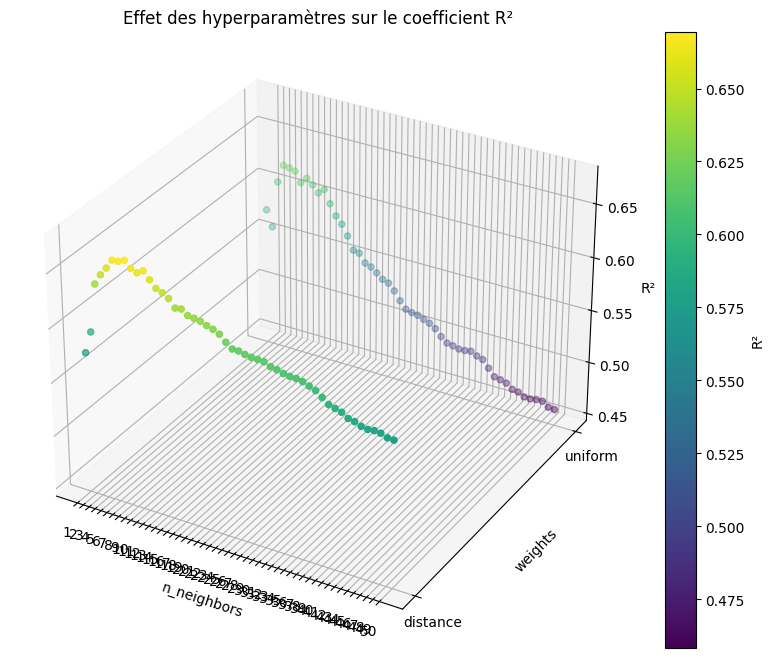

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

n_neighbors_values = range(1, 51)
weights_values = ['distance', 'uniform']

# Créer une grille de combinaisons d'hyperparamètres
hyperparameters_combinations = list(product(n_neighbors_values, weights_values))

# Initialisation des listes pour stocker les valeurs des hyperparamètres et de R²
n_neighbors_list = []
weights_list = []
r2_values = []

# Exploration des combinaisons d'hyperparamètres et calcul du R² pour chacune
for (n_neighbors, weights) in hyperparameters_combinations:
    knn = KNeighborsRegressor(n_neighbors=n_neighbors, weights=weights)
    knn.fit(X_train_transformed, Y_train)
    predictions = knn.predict(X_test_transoformed)
    r2 = r2_score(Y_test, predictions)
    n_neighbors_list.append(n_neighbors)
    weights_list.append(weights)
    r2_values.append(r2)

# Assigner des valeurs numériques uniques à chaque poids (weights)
weights_mapping = {weight: idx for idx, weight in enumerate(weights_values)}
weights_numeric = [weights_mapping[weight] for weight in weights_list]

# Tracé du diagramme 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Tracé des valeurs de R² en fonction des hyperparamètres n_neighbors et weights
sc = ax.scatter(n_neighbors_list, weights_numeric, r2_values, c=r2_values, cmap='viridis')
ax.set_xlabel('n_neighbors')
ax.set_ylabel('weights')
ax.set_zlabel('R²')
plt.title('Effet des hyperparamètres sur le coefficient R²')

# Ajout d'une barre de couleur
cbar = plt.colorbar(sc)
cbar.set_label('R²')

# Mettre à jour les étiquettes des axes
ax.set_xticks(n_neighbors_values)
ax.set_xticklabels([str(val) for val in n_neighbors_values])
ax.set_yticks(range(len(weights_values)))
ax.set_yticklabels(weights_values)

plt.show()


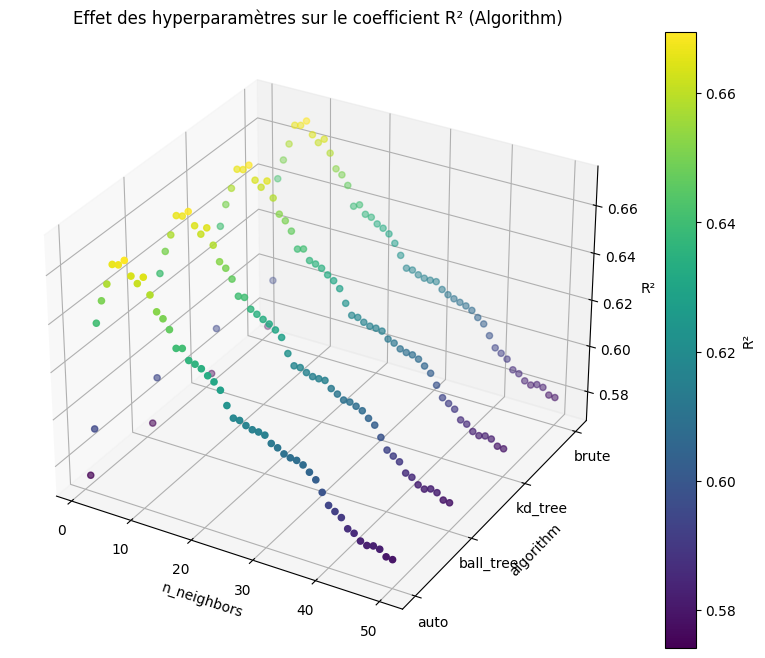

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

algorithm_values = ['auto', 'ball_tree', 'kd_tree', 'brute']
n_neighbors_values = range(1, 51)

# Initialisation des listes pour stocker les valeurs de K, algorithme et R²
n_neighbors_list_algo = []
algorithm_list = []
r2_values_algo = []

# Exploration des combinaisons d'hyperparamètres et calcul du R² pour chacune
for algorithm in algorithm_values:
    for n_neighbors in n_neighbors_values:
        knn = KNeighborsRegressor(n_neighbors=n_neighbors, weights='distance', algorithm=algorithm)
        knn.fit(X_train_transformed, Y_train)
        predictions = knn.predict(X_test_transoformed)
        r2 = r2_score(Y_test, predictions)
        n_neighbors_list_algo.append(n_neighbors)
        algorithm_list.append(algorithm)
        r2_values_algo.append(r2)

# Convertir les valeurs catégorielles (algorithm) en valeurs numériques arbitraires
algorithm_mapping = {algo: idx for idx, algo in enumerate(algorithm_values)}
algorithm_numeric = [algorithm_mapping[algo] for algo in algorithm_list]

# Tracé du diagramme 3D pour K en fonction de l'algorithme
fig_algo = plt.figure(figsize=(10, 8))
ax_algo = fig_algo.add_subplot(111, projection='3d')

# Tracé des valeurs de R² en fonction de K et de l'algorithme
sc_algo = ax_algo.scatter(n_neighbors_list_algo, algorithm_numeric, r2_values_algo, c=r2_values_algo, cmap='viridis')
ax_algo.set_xlabel('n_neighbors')
ax_algo.set_ylabel('algorithm')
ax_algo.set_zlabel('R²')
ax_algo.set_yticks(range(len(algorithm_values)))
ax_algo.set_yticklabels(algorithm_values)
plt.title('Effet des hyperparamètres sur le coefficient R² (Algorithm)')

# Ajout d'une barre de couleur
cbar_algo = plt.colorbar(sc_algo)
cbar_algo.set_label('R²')

plt.show()


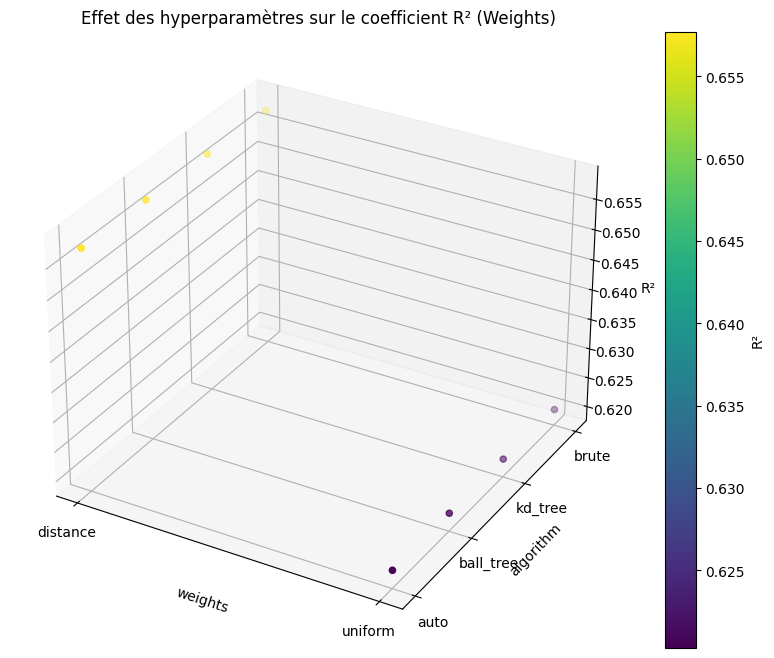

In [ ]:
weights_values = ['distance', 'uniform']

# Initialisation des listes pour stocker les valeurs de weights, algorithme et R²
weights_list_algo = []
algorithm_list_weights = []
r2_values_weights = []

# Exploration des combinaisons d'hyperparamètres et calcul du R² pour chacune
for algorithm in algorithm_values:
    for weight in weights_values:
        knn = KNeighborsRegressor(n_neighbors=5, weights=weight, algorithm=algorithm)
        knn.fit(X_train_transformed, Y_train)
        predictions = knn.predict(X_test_transoformed)
        r2 = r2_score(Y_test, predictions)
        weights_list_algo.append(weight)
        algorithm_list_weights.append(algorithm)
        r2_values_weights.append(r2)

# Convertir les valeurs catégorielles (algorithm) en valeurs numériques arbitraires
algorithm_numeric = [algorithm_mapping[algo] for algo in algorithm_list_weights]

# Convertir les valeurs catégorielles (weights) en valeurs numériques arbitraires
weights_mapping = {weight: idx for idx, weight in enumerate(weights_values)}
weights_numeric = [weights_mapping[weight] for weight in weights_list_algo]

# Tracé du diagramme 3D pour weights en fonction de l'algorithme
fig_weights = plt.figure(figsize=(10, 8))
ax_weights = fig_weights.add_subplot(111, projection='3d')

# Tracé des valeurs de R² en fonction de weights et de l'algorithme
sc_weights = ax_weights.scatter(weights_numeric, algorithm_numeric, r2_values_weights, c=r2_values_weights, cmap='viridis')
ax_weights.set_xlabel('weights')
ax_weights.set_ylabel('algorithm')
ax_weights.set_zlabel('R²')
ax_weights.set_xticks(range(len(weights_values)))
ax_weights.set_xticklabels(weights_values)
ax_weights.set_yticks(range(len(algorithm_values)))
ax_weights.set_yticklabels(algorithm_values)
plt.title('Effet des hyperparamètres sur le coefficient R² (Weights)')

# Ajout d'une barre de couleur
cbar_weights = plt.colorbar(sc_weights)
cbar_weights.set_label('R²')

plt.show()


In [ ]:
import pandas as pd
from itertools import product
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

# Définir les valeurs des hyperparamètres à explorer
n_neighbors_values = range(1, 51)
weights_values = ['distance', 'uniform']
algorithm_values = ['auto', 'ball_tree', 'kd_tree', 'brute']

# Créer une grille de combinaisons d'hyperparamètres
hyperparameters_combinations = list(product(n_neighbors_values, weights_values, algorithm_values))

# Initialisation d'une liste pour stocker les performances de chaque combinaison
performances = []

# Exploration des combinaisons d'hyperparamètres et calcul du R² pour chacune
for (n_neighbors, weights, algorithm) in hyperparameters_combinations:
    knn = KNeighborsRegressor(n_neighbors=n_neighbors, weights=weights, algorithm=algorithm)
    knn.fit(X_train_transformed, Y_train)
    predictions = knn.predict(X_test_transoformed)
    r2 = r2_score(Y_test, predictions)
    performances.append([n_neighbors, weights, algorithm, r2])

# Créer un DataFrame Pandas avec les performances
df_performances = pd.DataFrame(performances, columns=['n_neighbors', 'weights', 'algorithm', 'R²'])

# Afficher un tableau résumant les performances de chaque combinaison
print(df_performances)


     n_neighbors   weights  algorithm        R²
0              1  distance       auto  0.574149
1              1  distance  ball_tree  0.574149
2              1  distance    kd_tree  0.574149
3              1  distance      brute  0.574149
4              1   uniform       auto  0.574149
..           ...       ...        ...       ...
395           50  distance      brute  0.579486
396           50   uniform       auto  0.458303
397           50   uniform  ball_tree  0.458271
398           50   uniform    kd_tree  0.458303
399           50   uniform      brute  0.458294

[400 rows x 4 columns]


Algorithm: auto
Mean Squared Error: 86.19410570174534
R-squared Score: 0.6693696271525083
--------------------
Algorithm: ball_tree
Mean Squared Error: 86.19410570174534
R-squared Score: 0.6693696271525083
--------------------
Algorithm: kd_tree
Mean Squared Error: 86.19410570174534
R-squared Score: 0.6693696271525083
--------------------
Algorithm: brute
Mean Squared Error: 86.18359137190541
R-squared Score: 0.6694099588755063
--------------------


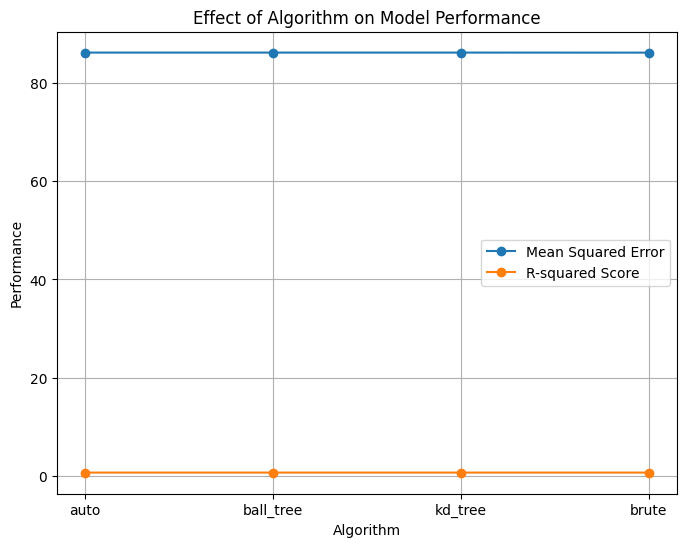

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Liste des algorithmes à tester
algorithm_values = ['auto', 'ball_tree', 'kd_tree', 'brute']

# Initialisation des listes pour stocker les performances
mse_values = []
r2_values = []

for algorithm in algorithm_values:
    # Création de l'instance du modèle KNN avec l'algorithme actuel
    knn_regressor = KNeighborsRegressor(n_neighbors=8, weights='distance', algorithm=algorithm)

    # Entraînement du modèle sur les données d'entraînement normalisées
    knn_regressor.fit(X_train_transformed, Y_train)

    # Prédiction sur les données de test
    predictions = knn_regressor.predict(X_test_transoformed)

    # Calcul des métriques d'évaluation pour chaque algorithme
    mse = mean_squared_error(Y_test, predictions)
    r2 = r2_score(Y_test, predictions)

    # Stockage des performances dans les listes
    mse_values.append(mse)
    r2_values.append(r2)

    # Affichage des résultats
    print(f"Algorithm: {algorithm}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared Score: {r2}")
    print("--------------------")

# Tracer les performances en fonction des algorithmes
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

plt.plot(algorithm_values, mse_values, label='Mean Squared Error', marker='o')
plt.plot(algorithm_values, r2_values, label='R-squared Score', marker='o')

plt.xlabel('Algorithm')
plt.ylabel('Performance')
plt.title('Effect of Algorithm on Model Performance')
plt.legend()
plt.grid(True)
plt.xticks(algorithm_values)  # Ajouter les noms des algorithmes sur l'axe x

plt.show()


Algorithm: auto
R-squared Score: 0.6693696271525083
--------------------
Algorithm: ball_tree
R-squared Score: 0.6693696271525083
--------------------
Algorithm: kd_tree
R-squared Score: 0.6693696271525083
--------------------
Algorithm: brute
R-squared Score: 0.6694099588755063
--------------------


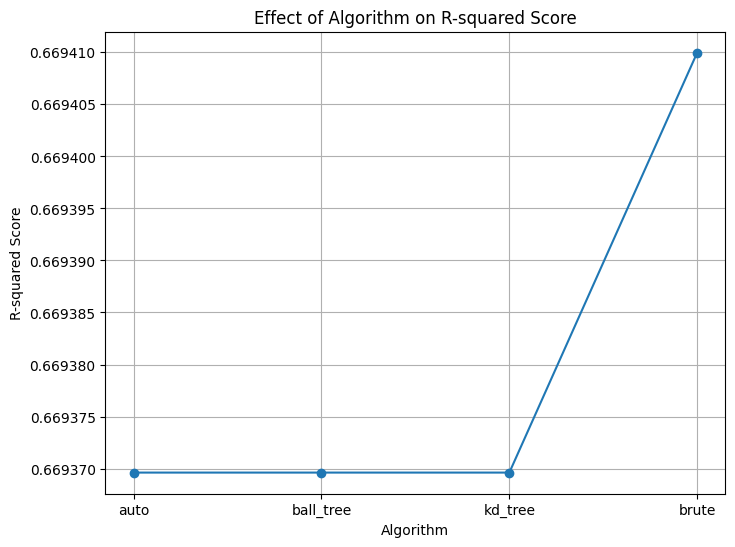

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Liste des algorithmes à tester
algorithm_values = ['auto', 'ball_tree', 'kd_tree', 'brute']

# Initialisation de la liste pour stocker les R²
r2_values = []

for algorithm in algorithm_values:
    # Création du modèle KNN avec l'algorithme actuel
    knn_regressor = KNeighborsRegressor(n_neighbors=8, weights='distance', algorithm=algorithm)

    # Entraînement du modèle sur les données d'entraînement normalisées
    knn_regressor.fit(X_train_transformed, Y_train)

    # Prédiction sur les données de test
    predictions = knn_regressor.predict(X_test_transoformed)

    # Calcul du R² pour chaque algorithme
    r2 = r2_score(Y_test, predictions)

    # Stockage des valeurs de R² dans la liste
    r2_values.append(r2)

    # Affichage des résultats
    print(f"Algorithm: {algorithm}")
    print(f"R-squared Score: {r2}")
    print("--------------------")

# Tracé des valeurs de R² en fonction des algorithmes
plt.figure(figsize=(8, 6))

plt.plot(algorithm_values, r2_values, marker='o')

plt.xlabel('Algorithm')
plt.ylabel('R-squared Score')
plt.title('Effect of Algorithm on R-squared Score')
plt.grid(True)
plt.xticks(algorithm_values)  # Ajouter les noms des algorithmes sur l'axe x

plt.show()


Algorithm: auto
R-squared Score: 0.6693696271525083
--------------------
Algorithm: ball_tree
R-squared Score: 0.6693696271525083
--------------------
Algorithm: kd_tree
R-squared Score: 0.6693696271525083
--------------------
Algorithm: brute
R-squared Score: 0.6694099588755063
--------------------


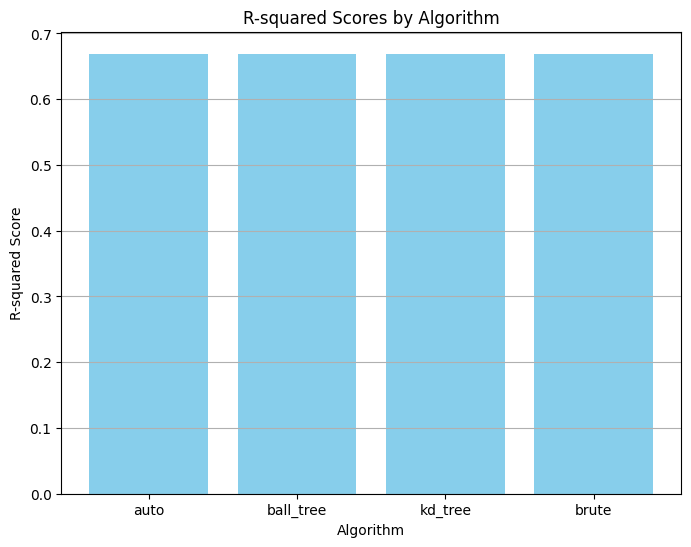

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Liste des algorithmes à tester
algorithm_values = ['auto', 'ball_tree', 'kd_tree', 'brute']

# Initialisation de la liste pour stocker les R²
r2_values = []

for algorithm in algorithm_values:
    # Création du modèle KNN avec l'algorithme actuel
    knn_regressor = KNeighborsRegressor(n_neighbors=8, weights='distance', algorithm=algorithm)

    # Entraînement du modèle sur les données d'entraînement normalisées
    knn_regressor.fit(X_train_transformed, Y_train)

    # Prédiction sur les données de test
    predictions = knn_regressor.predict(X_test_transoformed)

    # Calcul du R² pour chaque algorithme
    r2 = r2_score(Y_test, predictions)

    # Stockage des valeurs de R² dans la liste
    r2_values.append(r2)

    # Affichage des résultats
    print(f"Algorithm: {algorithm}")
    print(f"R-squared Score: {r2}")
    print("--------------------")

# Tracé des valeurs de R² sous forme d'histogramme
plt.figure(figsize=(8, 6))

plt.bar(algorithm_values, r2_values, color='skyblue')

plt.xlabel('Algorithm')
plt.ylabel('R-squared Score')
plt.title('R-squared Scores by Algorithm')
plt.grid(axis='y')

plt.show()


Algorithm: auto
R-squared Score: 0.6693696271525083
--------------------
Algorithm: ball_tree
R-squared Score: 0.6693696271525083
--------------------
Algorithm: kd_tree
R-squared Score: 0.6693696271525083
--------------------
Algorithm: brute
R-squared Score: 0.6694099588755063
--------------------


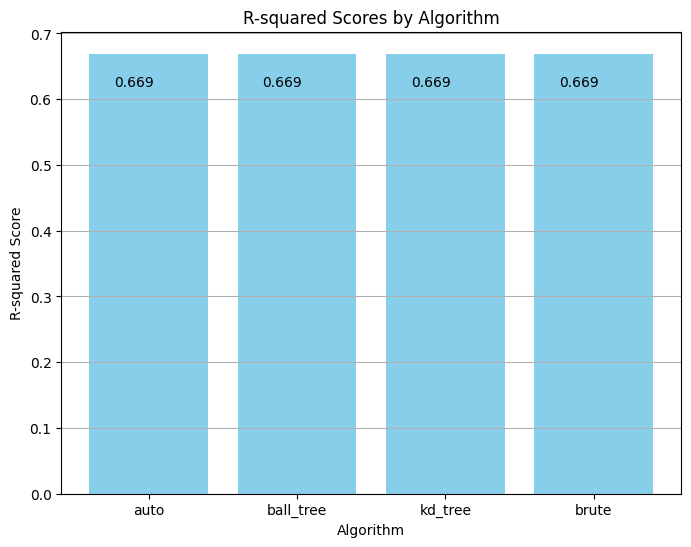

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Liste des algorithmes à tester
algorithm_values = ['auto', 'ball_tree', 'kd_tree', 'brute']

# Initialisation de la liste pour stocker les R²
r2_values = []

for algorithm in algorithm_values:
    # Création du modèle KNN avec l'algorithme actuel
    knn_regressor = KNeighborsRegressor(n_neighbors=8, weights='distance', algorithm=algorithm)

    # Entraînement du modèle sur les données d'entraînement normalisées
    knn_regressor.fit(X_train_transformed, Y_train)

    # Prédiction sur les données de test
    predictions = knn_regressor.predict(X_test_transoformed)

    # Calcul du R² pour chaque algorithme
    r2 = r2_score(Y_test, predictions)

    # Stockage des valeurs de R² dans la liste
    r2_values.append(r2)

    # Affichage des résultats
    print(f"Algorithm: {algorithm}")
    print(f"R-squared Score: {r2}")
    print("--------------------")

# Tracé des valeurs de R² sous forme d'histogramme avec annotations
plt.figure(figsize=(8, 6))

bars = plt.bar(algorithm_values, r2_values, color='skyblue')

# Ajout des valeurs R² au-dessus de chaque barre
for bar, r2_value in zip(bars, r2_values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() - 0.05, f'{r2_value:.3f}', ha='center', color='black', fontsize=10)

plt.xlabel('Algorithm')
plt.ylabel('R-squared Score')
plt.title('R-squared Scores by Algorithm')
plt.grid(axis='y')

plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import *

# Création de l'instance du modèle KNN avec les hyperparamètres
# weights='distance' attribue des poids basés sur la distance
# algorithm='auto' choisit automatiquement l'algorithme approprié
knn_regressor = KNeighborsRegressor(n_neighbors=8, weights='distance', algorithm='brute')

# Entraînement du modèle sur les données d'entraînement normalisées
knn_regressor.fit(X_train_transformed, Y_train)

# Prédiction sur les données de test
predictions = knn_regressor.predict(X_test_transoformed)

# Évaluation du modèle


mse = mean_squared_error(Y_test, predictions)
r2 = r2_score(Y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# Calcul des métriques d'évaluation
    mae = mean_absolute_error(Y_test, ppredictions)
    mse = mean_squared_error(Y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(Y_test, predictions)

    print("Mean Absolute Error (MAE) :", mae)
    print("Mean Squared Error (MSE) :", mse)
    print("Root Mean Squared Error (RMSE) :", rmse)
    print("R-squared (R²) :", r2)

IndentationError: unexpected indent (<ipython-input-6-6bad544a756f>, line 25)

In [3]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import *

# Création de l'instance du modèle KNN avec les hyperparamètres
# weights='distance' attribue des poids basés sur la distance
# algorithm='auto' choisit automatiquement l'algorithme approprié
knn_regressor = KNeighborsRegressor(n_neighbors=8, weights='distance', algorithm='brute')

# Entraînement du modèle sur les données d'entraînement normalisées
knn_regressor.fit(X_train_transformed, Y_train)

# Prédiction sur les données de test
predictions = knn_regressor.predict(X_test_transoformed)

# Calcul des métriques d'évaluation
mae = mean_absolute_error(Y_test, predictions)
mse = mean_squared_error(Y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, predictions)

print("Mean Absolute Error (MAE) :", mae)
print("Mean Squared Error (MSE) :", mse)
print("Root Mean Squared Error (RMSE) :", rmse)
print("R-squared (R²) :", r2)


Mean Absolute Error (MAE) : 6.632237247878024
Mean Squared Error (MSE) : 86.18359137190541
Root Mean Squared Error (RMSE) : 9.283511801678577
R-squared (R²) : 0.6694099588755063


In [4]:
# Faites des prédictions sur l'ensemble d'entraînement
y_pred_train = knn_regressor.predict(X_train_transformed)

# Calculez les métriques de performance sur l'ensemble d'entraînement
mae_train = mean_absolute_error(Y_train, y_pred_train)
rmse_train = mean_squared_error(Y_train, y_pred_train, squared=False)
r2_train = r2_score(Y_train, y_pred_train)



print("\nPerformance sur l'ensemble d'entraînement:")
print("Mean Absolute Error (MAE):", mae_train)
print("Root Mean Squared Error (RMSE):", rmse_train)
print("R-squared (R²):", r2_train)



Performance sur l'ensemble d'entraînement:
Mean Absolute Error (MAE): 0.06378894203342869
Root Mean Squared Error (RMSE): 0.9452743221836721
R-squared (R²): 0.9968369695524166
